In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
fraud_train_raw = pd.read_csv('./data/fraudTrain.csv')
fraud_test_raw = pd.read_csv('./data/fraudTest.csv')

In [4]:
fraud_train = fraud_train_raw.copy()
fraud_test = fraud_test_raw.copy()

In [5]:
fraud_train.shape

(1296675, 23)

In [6]:
fraud_train.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [7]:
fraud_train.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

<AxesSubplot:>

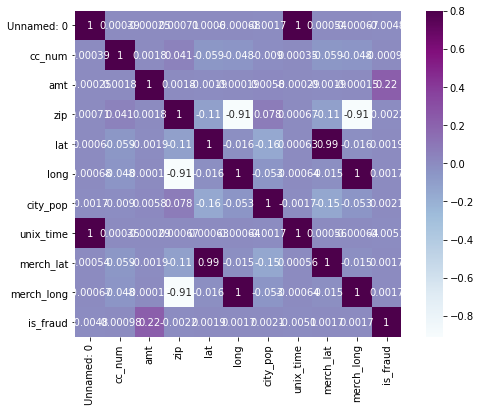

In [16]:
matrix = fraud_train.corr()
f, ax = plt.subplots(figsize=(9,6))
sns.heatmap(matrix, vmax=.8, square=True, cmap='BuPu', annot=True)

In [26]:
is_fraud = fraud_train[fraud_train['is_fraud']==1]
not_fraud = fraud_train[fraud_train['is_fraud']==0]
print(
f"""
Fraud: {len(is_fraud)}
Not Fraud: {len(not_fraud)}
Total: {len(is_fraud)+len(not_fraud)}
"""
)


Fraud: 7506
Not Fraud: 1289169
Total: 1296675



<AxesSubplot:xlabel='Amt_Bin'>

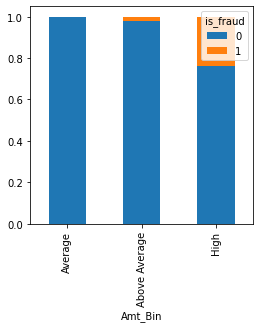

In [9]:
Amt = pd.crosstab(fraud_train['amt'], fraud_train['is_fraud'])
amt_bin = [0,100,1000,30000]
amt_groups = ['Average','Above Average', 'High']
fraud_train['Amt_Bin'] = pd.cut(fraud_train['amt'], amt_bin, labels = amt_groups)
amt_bin = pd.crosstab(fraud_train['Amt_Bin'], fraud_train['is_fraud'])
amt_bin.div(amt_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

<AxesSubplot:xlabel='category'>

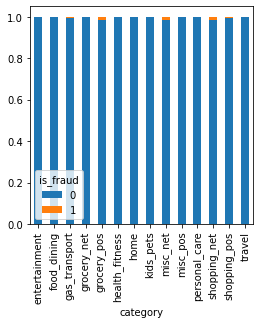

In [10]:
Category = pd.crosstab(fraud_train['category'], fraud_train['is_fraud'])
Category.div(Category.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

<AxesSubplot:xlabel='category'>

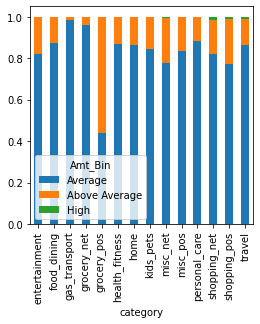

In [11]:
Cat_amt = pd.crosstab(fraud_train['category'], fraud_train['Amt_Bin'])
Cat_amt.div(Cat_amt.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='unix_time', ylabel='Density'>

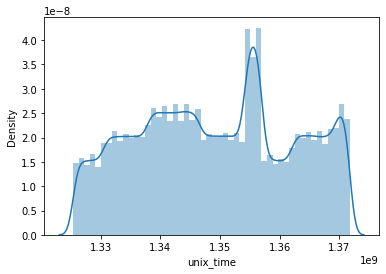

In [12]:
sns.distplot(fraud_train['unix_time'])

<AxesSubplot:xlabel='Time_Bin'>

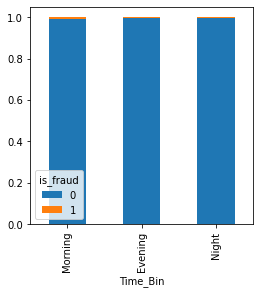

In [14]:
Time = pd.crosstab(fraud_train['unix_time'], fraud_train['is_fraud'])
time_bin = [0,1330000000,1350000000,1380000000]
time_groups = ['Morning','Evening', 'Night']
fraud_train['Time_Bin'] = pd.cut(fraud_train['unix_time'], time_bin, labels = time_groups)
time_bin = pd.crosstab(fraud_train['Time_Bin'], fraud_train['is_fraud'])
time_bin.div(time_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))